<img src="http://cailab.appspot.com/images/logo.png" />

In [20]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Importar Imagenes de Emociones

In [21]:
ira_dir = os.path.join('CK/anger')
contento_dir = os.path.join('CK/contempt')
disgusto_dir = os.path.join('CK/disgust')
miedo_dir = os.path.join('CK/fear')
feliz_dir = os.path.join('CK/happy')
tristeza_dir = os.path.join('CK/sadness')
sorpresa_dir = os.path.join('CK/surprise')

ira_archivos = os.listdir(ira_dir)
contento_archivos = os.listdir(contento_dir)
disgusto_archivos = os.listdir(disgusto_dir)
miedo_archivos = os.listdir(miedo_dir)
feliz_archivos = os.listdir(feliz_dir)
tristeza_archivos = os.listdir(tristeza_dir)
sorpresa_archivos = os.listdir(sorpresa_dir)

### Deplegar 2 Images de DataSet

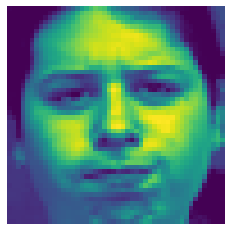

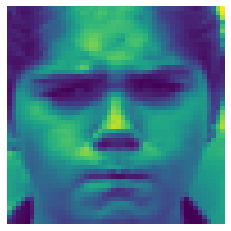

In [22]:
total = 2

# cargar las rutas de 5 imagenes
ira_ejemplos = [os.path.join(ira_dir, nombre) for nombre in ira_archivos[1:total+1]]

# deplegar las 2 imagenes
for i, ruta in enumerate(ira_ejemplos):
    img = mpimg.imread(ruta)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

### Tensorflow + Keras

In [23]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

#### Definir la configuracion de entrenamiento

In [24]:
ENTRENAMIENTO_DIR = "CK/"
PRUEBAS_DIR = "CK_PRUEBAS/"

# configuracion de entrenamiento
entrenamiento_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# generador
generador_entrenamiento = entrenamiento_datagen.flow_from_directory(
    ENTRENAMIENTO_DIR,
    target_size=(48,48),
    class_mode='categorical'
)

# configuacion de pruebas (test set)
pruebas_datagen = ImageDataGenerator(rescale=1./255)

# generador
generator_pruebas = pruebas_datagen.flow_from_directory(
        PRUEBAS_DIR,
        target_size=(48, 48),
        class_mode='categorical')

Found 911 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


#### Crear la red neuronal convolutional (modelo)

In [25]:
# Arquitectura convolucional

modelo = tf.keras.models.Sequential([
    # primera capa
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # segunda capa
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tercera capa
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # cuarta capa
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Red Neuronal Flat
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuronas ocultas
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Entrenar el modelo y salvarlo como reconcedor-facial.h5

modelo.summary()
modelo.compile(loss = 'categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
# entrenar 500 veces el modelo (esto dura un rato. Vaya por cafe!)
historia = modelo.fit_generator(
    generador_entrenamiento, 
    epochs = 500, 
    verbose = 1,
    validation_data=generator_pruebas
)

# salvar el modelo
modelo.save("reconcedor-facial.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 128)         147584    
__________

29/29 [==============================] - 5s 188ms/step - loss: 0.9560 - acc: 0.6367 - val_loss: 2.2937 - val_acc: 0.3714
Epoch 31/500
29/29 [==============================] - 5s 181ms/step - loss: 0.9484 - acc: 0.6432 - val_loss: 2.6115 - val_acc: 0.3714
Epoch 32/500
29/29 [==============================] - 5s 188ms/step - loss: 0.8983 - acc: 0.6773 - val_loss: 2.1953 - val_acc: 0.4429
Epoch 33/500
29/29 [==============================] - 5s 179ms/step - loss: 0.9217 - acc: 0.6575 - val_loss: 2.2574 - val_acc: 0.4143
Epoch 34/500
29/29 [==============================] - 5s 182ms/step - loss: 0.8717 - acc: 0.6839 - val_loss: 2.4146 - val_acc: 0.4143
Epoch 35/500
29/29 [==============================] - 6s 191ms/step - loss: 0.8447 - acc: 0.6850 - val_loss: 2.1393 - val_acc: 0.4286
Epoch 36/500
29/29 [==============================] - 6s 190ms/step - loss: 0.8692 - acc: 0.7058 - val_loss: 2.3310 - val_acc: 0.4429
Epoch 37/500
29/29 [==============================] - 5s 183ms/step - loss:

29/29 [==============================] - 5s 171ms/step - loss: 0.4923 - acc: 0.8057 - val_loss: 1.7026 - val_acc: 0.7286
Epoch 69/500
29/29 [==============================] - 5s 170ms/step - loss: 0.4950 - acc: 0.8200 - val_loss: 2.3154 - val_acc: 0.6286
Epoch 70/500
29/29 [==============================] - 5s 174ms/step - loss: 0.4866 - acc: 0.8189 - val_loss: 2.0612 - val_acc: 0.7143
Epoch 71/500
29/29 [==============================] - 5s 167ms/step - loss: 0.5058 - acc: 0.8189 - val_loss: 2.2776 - val_acc: 0.7143
Epoch 72/500
29/29 [==============================] - 5s 168ms/step - loss: 0.4894 - acc: 0.8211 - val_loss: 2.1100 - val_acc: 0.7143
Epoch 73/500
29/29 [==============================] - 5s 166ms/step - loss: 0.4851 - acc: 0.8255 - val_loss: 1.7580 - val_acc: 0.7143
Epoch 74/500
29/29 [==============================] - 5s 170ms/step - loss: 0.4814 - acc: 0.8266 - val_loss: 1.9652 - val_acc: 0.6714
Epoch 75/500
29/29 [==============================] - 5s 170ms/step - loss:

29/29 [==============================] - 5s 173ms/step - loss: 0.4164 - acc: 0.8507 - val_loss: 2.4450 - val_acc: 0.7429
Epoch 107/500
29/29 [==============================] - 5s 168ms/step - loss: 0.3617 - acc: 0.8705 - val_loss: 2.2979 - val_acc: 0.7571
Epoch 108/500
29/29 [==============================] - 5s 168ms/step - loss: 0.3194 - acc: 0.8847 - val_loss: 1.9677 - val_acc: 0.6857
Epoch 109/500
29/29 [==============================] - 5s 173ms/step - loss: 0.4067 - acc: 0.8551 - val_loss: 3.0508 - val_acc: 0.6286
Epoch 110/500
29/29 [==============================] - 5s 168ms/step - loss: 0.3596 - acc: 0.8727 - val_loss: 2.2812 - val_acc: 0.7000
Epoch 111/500
29/29 [==============================] - 5s 167ms/step - loss: 0.3289 - acc: 0.8968 - val_loss: 2.2543 - val_acc: 0.7143
Epoch 112/500
29/29 [==============================] - 5s 166ms/step - loss: 0.3138 - acc: 0.8847 - val_loss: 2.6063 - val_acc: 0.7143
Epoch 113/500
29/29 [==============================] - 5s 175ms/step 

Epoch 144/500
29/29 [==============================] - 5s 169ms/step - loss: 0.2602 - acc: 0.9056 - val_loss: 2.2047 - val_acc: 0.7429
Epoch 145/500
29/29 [==============================] - 5s 167ms/step - loss: 0.2466 - acc: 0.9133 - val_loss: 2.0311 - val_acc: 0.7714
Epoch 146/500
29/29 [==============================] - 5s 165ms/step - loss: 0.2396 - acc: 0.9166 - val_loss: 2.4844 - val_acc: 0.7857
Epoch 147/500
29/29 [==============================] - 5s 175ms/step - loss: 0.2281 - acc: 0.9210 - val_loss: 2.3461 - val_acc: 0.7857
Epoch 148/500
29/29 [==============================] - 5s 167ms/step - loss: 0.2986 - acc: 0.8935 - val_loss: 2.6076 - val_acc: 0.7571
Epoch 149/500
29/29 [==============================] - 5s 166ms/step - loss: 0.2656 - acc: 0.9122 - val_loss: 2.1761 - val_acc: 0.7857
Epoch 150/500
29/29 [==============================] - 5s 168ms/step - loss: 0.3380 - acc: 0.8847 - val_loss: 2.8041 - val_acc: 0.7429
Epoch 151/500
29/29 [==============================] - 

Epoch 182/500
29/29 [==============================] - 5s 167ms/step - loss: 0.2634 - acc: 0.9034 - val_loss: 2.0540 - val_acc: 0.8000
Epoch 183/500
29/29 [==============================] - 5s 168ms/step - loss: 0.2150 - acc: 0.9286 - val_loss: 2.5832 - val_acc: 0.6857
Epoch 184/500
29/29 [==============================] - 5s 179ms/step - loss: 0.1909 - acc: 0.9308 - val_loss: 2.6641 - val_acc: 0.8143
Epoch 185/500
29/29 [==============================] - 5s 169ms/step - loss: 0.2597 - acc: 0.9034 - val_loss: 2.3084 - val_acc: 0.8143
Epoch 186/500
29/29 [==============================] - 5s 167ms/step - loss: 0.2090 - acc: 0.9286 - val_loss: 2.2208 - val_acc: 0.8000
Epoch 187/500
29/29 [==============================] - 5s 166ms/step - loss: 0.1762 - acc: 0.9374 - val_loss: 2.4710 - val_acc: 0.7857
Epoch 188/500
29/29 [==============================] - 5s 174ms/step - loss: 0.2245 - acc: 0.9308 - val_loss: 2.3719 - val_acc: 0.7714
Epoch 189/500
29/29 [==============================] - 

Epoch 220/500
29/29 [==============================] - 5s 186ms/step - loss: 0.2009 - acc: 0.9276 - val_loss: 1.6403 - val_acc: 0.8143
Epoch 221/500
29/29 [==============================] - 5s 186ms/step - loss: 0.2298 - acc: 0.9188 - val_loss: 1.5379 - val_acc: 0.8143
Epoch 222/500
29/29 [==============================] - 5s 181ms/step - loss: 0.1712 - acc: 0.9418 - val_loss: 1.9076 - val_acc: 0.7857
Epoch 223/500
29/29 [==============================] - 5s 181ms/step - loss: 0.1799 - acc: 0.9297 - val_loss: 1.7394 - val_acc: 0.7429
Epoch 224/500
29/29 [==============================] - 5s 179ms/step - loss: 0.1841 - acc: 0.9276 - val_loss: 1.4824 - val_acc: 0.8143
Epoch 225/500
29/29 [==============================] - 5s 186ms/step - loss: 0.1725 - acc: 0.9418 - val_loss: 1.7373 - val_acc: 0.8000
Epoch 226/500
29/29 [==============================] - 5s 179ms/step - loss: 0.1616 - acc: 0.9385 - val_loss: 1.6653 - val_acc: 0.7857
Epoch 227/500
29/29 [==============================] - 

Epoch 258/500
29/29 [==============================] - 5s 180ms/step - loss: 0.1716 - acc: 0.9319 - val_loss: 1.8402 - val_acc: 0.8286
Epoch 259/500
29/29 [==============================] - 5s 179ms/step - loss: 0.1697 - acc: 0.9396 - val_loss: 2.2568 - val_acc: 0.8000
Epoch 260/500
29/29 [==============================] - 5s 177ms/step - loss: 0.1542 - acc: 0.9440 - val_loss: 2.3648 - val_acc: 0.8143
Epoch 261/500
29/29 [==============================] - 5s 177ms/step - loss: 0.2231 - acc: 0.9254 - val_loss: 2.2600 - val_acc: 0.8286
Epoch 262/500
29/29 [==============================] - 6s 199ms/step - loss: 0.1740 - acc: 0.9374 - val_loss: 1.9819 - val_acc: 0.8143
Epoch 263/500
29/29 [==============================] - 5s 182ms/step - loss: 0.2052 - acc: 0.9330 - val_loss: 1.4525 - val_acc: 0.8286
Epoch 264/500
29/29 [==============================] - 6s 207ms/step - loss: 0.1658 - acc: 0.9440 - val_loss: 1.9121 - val_acc: 0.8143
Epoch 265/500
29/29 [==============================] - 

Epoch 296/500
29/29 [==============================] - 6s 195ms/step - loss: 0.1423 - acc: 0.9462 - val_loss: 2.6580 - val_acc: 0.8143
Epoch 297/500
29/29 [==============================] - 6s 214ms/step - loss: 0.1205 - acc: 0.9539 - val_loss: 2.7126 - val_acc: 0.7857
Epoch 298/500
29/29 [==============================] - 6s 204ms/step - loss: 0.1478 - acc: 0.9473 - val_loss: 2.8388 - val_acc: 0.8286
Epoch 299/500
29/29 [==============================] - 6s 205ms/step - loss: 0.1296 - acc: 0.9506 - val_loss: 2.9444 - val_acc: 0.8143
Epoch 300/500
29/29 [==============================] - 6s 209ms/step - loss: 0.1514 - acc: 0.9396 - val_loss: 2.7351 - val_acc: 0.7857
Epoch 301/500
29/29 [==============================] - 6s 202ms/step - loss: 0.1023 - acc: 0.9605 - val_loss: 2.6731 - val_acc: 0.8143
Epoch 302/500
29/29 [==============================] - 6s 210ms/step - loss: 0.1507 - acc: 0.9407 - val_loss: 2.7045 - val_acc: 0.8286
Epoch 303/500
29/29 [==============================] - 

Epoch 334/500
29/29 [==============================] - 6s 224ms/step - loss: 0.1309 - acc: 0.9517 - val_loss: 2.9119 - val_acc: 0.8429
Epoch 335/500
29/29 [==============================] - 6s 202ms/step - loss: 0.1572 - acc: 0.9374 - val_loss: 2.7124 - val_acc: 0.8000
Epoch 336/500
29/29 [==============================] - 5s 185ms/step - loss: 0.1346 - acc: 0.9561 - val_loss: 2.3714 - val_acc: 0.7857
Epoch 337/500
29/29 [==============================] - 5s 183ms/step - loss: 0.1251 - acc: 0.9517 - val_loss: 2.2147 - val_acc: 0.7857
Epoch 338/500
29/29 [==============================] - 6s 190ms/step - loss: 0.1290 - acc: 0.9550 - val_loss: 2.8019 - val_acc: 0.8000
Epoch 339/500
29/29 [==============================] - 6s 207ms/step - loss: 0.1484 - acc: 0.9440 - val_loss: 2.9347 - val_acc: 0.8000
Epoch 340/500
29/29 [==============================] - 6s 221ms/step - loss: 0.1224 - acc: 0.9572 - val_loss: 2.3891 - val_acc: 0.8286
Epoch 341/500
29/29 [==============================] - 

Epoch 372/500
29/29 [==============================] - 6s 193ms/step - loss: 0.1013 - acc: 0.9704 - val_loss: 2.0824 - val_acc: 0.8143
Epoch 373/500
29/29 [==============================] - 5s 184ms/step - loss: 0.1051 - acc: 0.9594 - val_loss: 1.7469 - val_acc: 0.8000
Epoch 374/500
29/29 [==============================] - 5s 173ms/step - loss: 0.1029 - acc: 0.9638 - val_loss: 1.6663 - val_acc: 0.8286
Epoch 375/500
29/29 [==============================] - 6s 206ms/step - loss: 0.1134 - acc: 0.9638 - val_loss: 1.8461 - val_acc: 0.8571
Epoch 376/500
29/29 [==============================] - 8s 260ms/step - loss: 0.1405 - acc: 0.9550 - val_loss: 2.2119 - val_acc: 0.8571
Epoch 377/500
29/29 [==============================] - 7s 246ms/step - loss: 0.1279 - acc: 0.9583 - val_loss: 2.2277 - val_acc: 0.8429
Epoch 378/500
29/29 [==============================] - 6s 215ms/step - loss: 0.0908 - acc: 0.9649 - val_loss: 2.1452 - val_acc: 0.8571
Epoch 379/500
29/29 [==============================] - 

Epoch 410/500
29/29 [==============================] - 5s 176ms/step - loss: 0.0815 - acc: 0.9759 - val_loss: 2.2935 - val_acc: 0.8571
Epoch 411/500
29/29 [==============================] - 5s 173ms/step - loss: 0.0997 - acc: 0.9616 - val_loss: 2.2010 - val_acc: 0.8143
Epoch 412/500
29/29 [==============================] - 5s 170ms/step - loss: 0.0860 - acc: 0.9737 - val_loss: 1.9406 - val_acc: 0.8286
Epoch 413/500
29/29 [==============================] - 5s 171ms/step - loss: 0.1398 - acc: 0.9528 - val_loss: 2.2473 - val_acc: 0.8143
Epoch 414/500
29/29 [==============================] - 5s 171ms/step - loss: 0.1136 - acc: 0.9561 - val_loss: 2.2146 - val_acc: 0.8286
Epoch 415/500
29/29 [==============================] - 5s 172ms/step - loss: 0.1130 - acc: 0.9583 - val_loss: 2.2629 - val_acc: 0.8286
Epoch 416/500
29/29 [==============================] - 5s 173ms/step - loss: 0.1440 - acc: 0.9495 - val_loss: 2.1815 - val_acc: 0.8429
Epoch 417/500
29/29 [==============================] - 

Epoch 448/500
29/29 [==============================] - 5s 170ms/step - loss: 0.1051 - acc: 0.9583 - val_loss: 2.1701 - val_acc: 0.8571
Epoch 449/500
29/29 [==============================] - 5s 170ms/step - loss: 0.0816 - acc: 0.9671 - val_loss: 2.0935 - val_acc: 0.8571
Epoch 450/500
29/29 [==============================] - 5s 169ms/step - loss: 0.0951 - acc: 0.9660 - val_loss: 2.3379 - val_acc: 0.8429
Epoch 451/500
29/29 [==============================] - 5s 171ms/step - loss: 0.0943 - acc: 0.9682 - val_loss: 2.0612 - val_acc: 0.8571
Epoch 452/500
29/29 [==============================] - 5s 171ms/step - loss: 0.1316 - acc: 0.9682 - val_loss: 2.0088 - val_acc: 0.8429
Epoch 453/500
29/29 [==============================] - 5s 169ms/step - loss: 0.0877 - acc: 0.9627 - val_loss: 2.0466 - val_acc: 0.8571
Epoch 454/500
29/29 [==============================] - 5s 176ms/step - loss: 0.0857 - acc: 0.9726 - val_loss: 2.1687 - val_acc: 0.8571
Epoch 455/500
29/29 [==============================] - 

Epoch 486/500
29/29 [==============================] - 5s 171ms/step - loss: 0.0848 - acc: 0.9726 - val_loss: 2.2425 - val_acc: 0.8429
Epoch 487/500
29/29 [==============================] - 5s 169ms/step - loss: 0.1105 - acc: 0.9649 - val_loss: 2.2570 - val_acc: 0.8143
Epoch 488/500
29/29 [==============================] - 5s 171ms/step - loss: 0.0870 - acc: 0.9693 - val_loss: 2.0441 - val_acc: 0.8286
Epoch 489/500
29/29 [==============================] - 5s 169ms/step - loss: 0.0935 - acc: 0.9704 - val_loss: 2.0343 - val_acc: 0.8143
Epoch 490/500
29/29 [==============================] - 5s 171ms/step - loss: 0.0849 - acc: 0.9748 - val_loss: 2.2025 - val_acc: 0.8000
Epoch 491/500
29/29 [==============================] - 5s 172ms/step - loss: 0.0875 - acc: 0.9649 - val_loss: 2.0786 - val_acc: 0.8286
Epoch 492/500
29/29 [==============================] - 5s 171ms/step - loss: 0.0990 - acc: 0.9572 - val_loss: 2.3218 - val_acc: 0.8429
Epoch 493/500
29/29 [==============================] - 

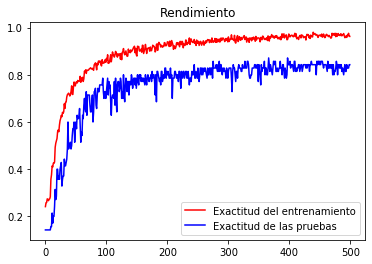

<Figure size 432x288 with 0 Axes>

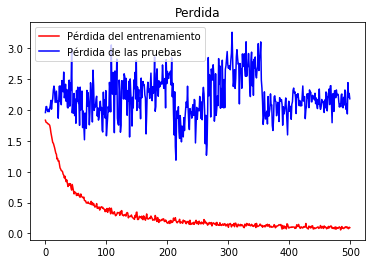

<Figure size 432x288 with 0 Axes>

In [28]:
# Entre mas cercano a 1, mejor es la capacidad predictiva.
entrenamiento_acc = historia.history['acc']
entrenamiento_perdida = historia.history['loss']

pruebas_acc = historia.history['val_acc']
pruebas_perdida = historia.history['val_loss']

epochs = range(len(entrenamiento_acc))

plt.plot(epochs, entrenamiento_acc, 'r', label='Exactitud del entrenamiento')
plt.plot(epochs, pruebas_acc, 'b', label='Exactitud de las pruebas')
plt.title('Rendimiento')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, entrenamiento_perdida, 'r', label='Pérdida del entrenamiento')
plt.plot(epochs, pruebas_perdida, 'b', label='Pérdida de las pruebas')
plt.title('Perdida')
plt.legend(loc=0)
plt.figure()

plt.show()

### Predicción de Emociones

In [29]:
# cargamos el modelo desde el archivo
# para no tener que entrenarlo cada vez

from keras.preprocessing import image
import numpy as np

modelo = tf.keras.models.load_model('reconcedor-facial.h5')

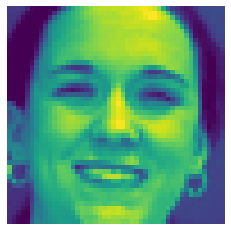

Emoción estimada: feliz !


In [30]:
# prediccion

# classes
etiquetas = ['ira','contento','disgusto','miedo','feliz','tristeza','sorpresa']
archivo = feliz_dir + '/' + feliz_archivos[30]

img = image.load_img(archivo, target_size=(48, 48))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

imagenes = np.vstack([x])
clases = modelo.predict(imagenes, batch_size=1)
indice = clases.tolist()[0].index(1.0)

img = mpimg.imread(archivo)
plt.imshow(img)
plt.axis('Off')
plt.show()

print("Emoción estimada:", etiquetas[indice],"!")